In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)


In [5]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [6]:
# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


In [7]:
# Compute explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)


In [8]:
# Compute cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


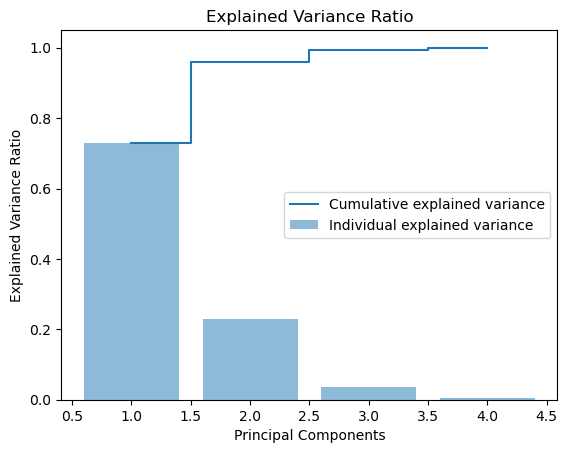

In [9]:
# Plot explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance Ratio')
plt.show()


In [10]:
# Project data onto principal components
projected_data = X_scaled.dot(eigenvectors)


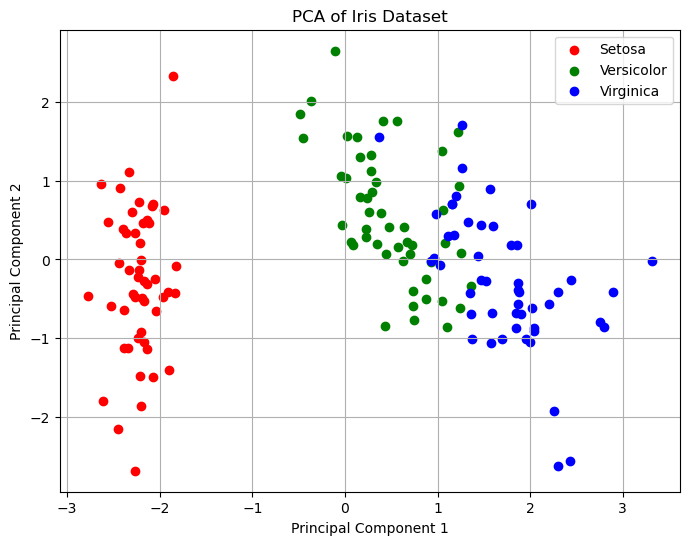

In [11]:
# Plot projected data
plt.figure(figsize=(8, 6))
for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(projected_data[i, 0], projected_data[i, 1], color='r', label='Setosa' if i == 0 else "")
    elif y[i] == 1:
        plt.scatter(projected_data[i, 0], projected_data[i, 1], color='g', label='Versicolor' if i == 50 else "")
    else:
        plt.scatter(projected_data[i, 0], projected_data[i, 1], color='b', label='Virginica' if i == 100 else "")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(loc='best')
plt.grid()
plt.show()
